In [23]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

y_train = train['label']
X_train = train.drop(columns=['label'])

X_train = X_train / 255.0
test = test / 255.0

In [5]:
X_train = X_train.values
y_train = y_train.values
test = test.values

# 이미지 형태로 변환
X_train = X_train.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

# 레이블 원-핫 인코딩
#y_train = to_categorical(y_train, num_classes=10)

# train/validation 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)  # (num_samples, 28, 28, 1)
print(y_train.shape)  # (num_samples, 10)
print(X_val.shape)    # (num_samples, 28, 28, 1)
print(y_val.shape)    # (num_samples, 10)
print(test.shape)     

(33600, 28, 28, 1)
(33600,)
(8400, 28, 28, 1)
(8400,)
(28000, 28, 28, 1)


In [16]:
#모델 정의 (책 - 머신러닝 교과서(세바스찬 라시카) + https://ohgym.tistory.com/31)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(
    kernel_size=(5, 5),
    strides=(1,1),
    filters=32,
    padding = 'same',
    data_format ='channels_last',
    name = 'conv_1',
    activation = 'relu'))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name = 'pool_1'))
model.add(Conv2D(filters=64,
                 kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 name = 'conv_2',
                 activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name = 'pool_2'))
model.add(Flatten())
model.add(Dense(
    units=1024,
    name = 'fc_1',
    activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(
    units=10,
    name = 'fc_2',
    activation='softmax'))

In [17]:
tf.random.set_seed(1)
model.build(input_shape = (None,28,28,1))
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 1024)           │     3,212,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    shuffle = True,
                    validation_data=(X_val, y_val))

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 50s 93ms/step - accuracy: 0.8687 - loss: 0.4082 - val_accuracy: 0.9808 - val_loss: 0.0641
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 48s 92ms/step - accuracy: 0.9810 - loss: 0.0675 - val_accuracy: 0.9865 - val_loss: 0.0431
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9845 - loss: 0.0494 - val_accuracy: 0.9890 - val_loss: 0.0335
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 49s 93ms/step - accuracy: 0.9880 - loss: 0.0388 - val_accuracy: 0.9889 - val_loss: 0.0280
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 49s 92ms/step - accuracy: 0.9907 - loss: 0.0316 - val_accuracy: 0.9914 - val_loss: 0.0247
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.9921 - loss: 0.0259 - val_accuracy: 0.9907 - val_loss: 0.0280
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 50s 94ms/step - accuracy: 0.9924 - loss: 0.0262 - val_accuracy: 0.9913 - val_loss: 0.0263
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.9941 - loss: 0.0175 - 

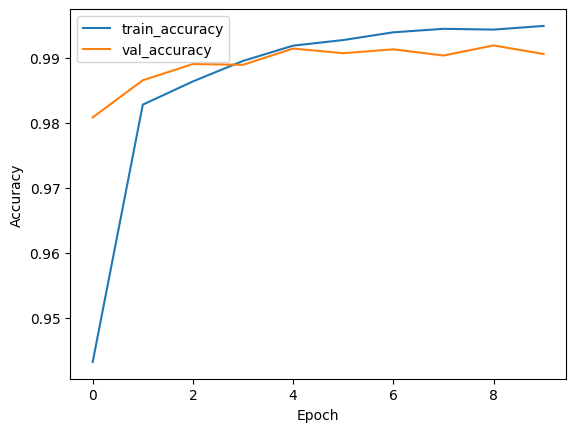

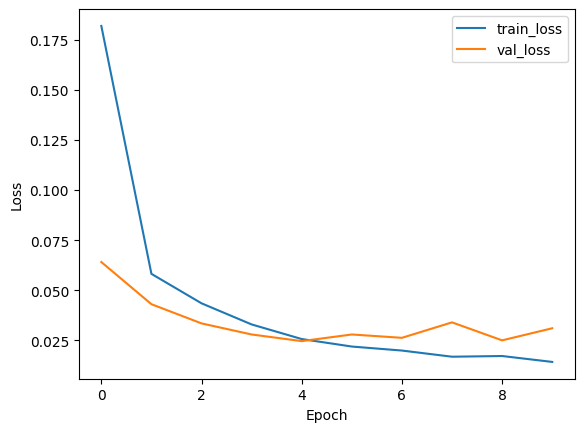

In [20]:
# 학습 과정 시각화
import matplotlib.pyplot as plt

# 정확도 그래프
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_classes) + 1), 'Label': predicted_classes})
submission.to_csv('submission.csv', index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step
